In [3]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import graphviz 
import pickle 
%matplotlib inline

In [4]:
# The dataset we want to use originates from Kaggle. 
# "The consumer credit department of a bank wants to automate the decisionmaking process for approval of 
#  home equity lines of credit."
# "The TARGET variable is a flag. 
#  If the value is a "1" then the person defaulted on the loan. 
#  If the value is a "0" then the person paid back the loan."
# AIM: Develop a model to predict whether a customer will default on a loan.
# The dataset can be downloaded at:
# https://www.kaggle.com/ajay1735/hmeq-data/download

In [6]:
mydata = pd.read_csv("/Users/teodorf/Desktop/Software-Engineering-for-Data-Intesive-AI-Applications/hmeq.csv")
mydata.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
# BAD       1=Client defaulted on loan
#           0 = loan repaid
# LOAN      Amount of the loan request
# MORTDUE   Amount due on existing mortgage
# VALUE     Value of current property
# REASON    DebtCon = debt consolidation 
#           HomeImp = home improvement
# JOB       Six occupational categories
# YOJ       Years at present job
# DEROG     Number of major derogatory reports
# DELINQ    Number of delinquent credit lines
# CLAGE     Age of oldest trade line in months
# NINQ      Number of recent credit lines
# CLNO      Number of credit lines
# DEBTINC   Debt-to-income ratio

In [8]:
# Rename first column and code 1 as BAD
mydata.rename(columns={ mydata.columns[0]: "RiskPerformance" }, inplace = True)
#codes = {1:'Bad', 0:'Good'}
#mydata['RiskPerformance'] = mydata['RiskPerformance'].map(codes)
mydata.head()

,RiskPerformance,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [9]:
# Have a quick look at the variables to see the range and numbers
mydata.describe()

,RiskPerformance,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [10]:
# Check the types to ensure data is interpret correctly
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RiskPerformance  5960 non-null   int64  
 1   LOAN             5960 non-null   int64  
 2   MORTDUE          5442 non-null   float64
 3   VALUE            5848 non-null   float64
 4   REASON           5708 non-null   object 
 5   JOB              5681 non-null   object 
 6   YOJ              5445 non-null   float64
 7   DEROG            5252 non-null   float64
 8   DELINQ           5380 non-null   float64
 9   CLAGE            5652 non-null   float64
 10  NINQ             5450 non-null   float64
 11  CLNO             5738 non-null   float64
 12  DEBTINC          4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [11]:
# Note, this dataset is slightly imbalanced, fewer "Bad":s than "Good":s.
# There is a bunch of tricks to deal with imbalance, e.g. upsampling the
# minority class or downsampling the majority class. We will not do this here
# but we recommend that you are careful if having few positive examples as some 
# algorithms may not perform well (e.g. DTs). 
mydata['RiskPerformance'].value_counts()/mydata.shape[0]

0    0.800503
1    0.199497
Name: RiskPerformance, dtype: float64

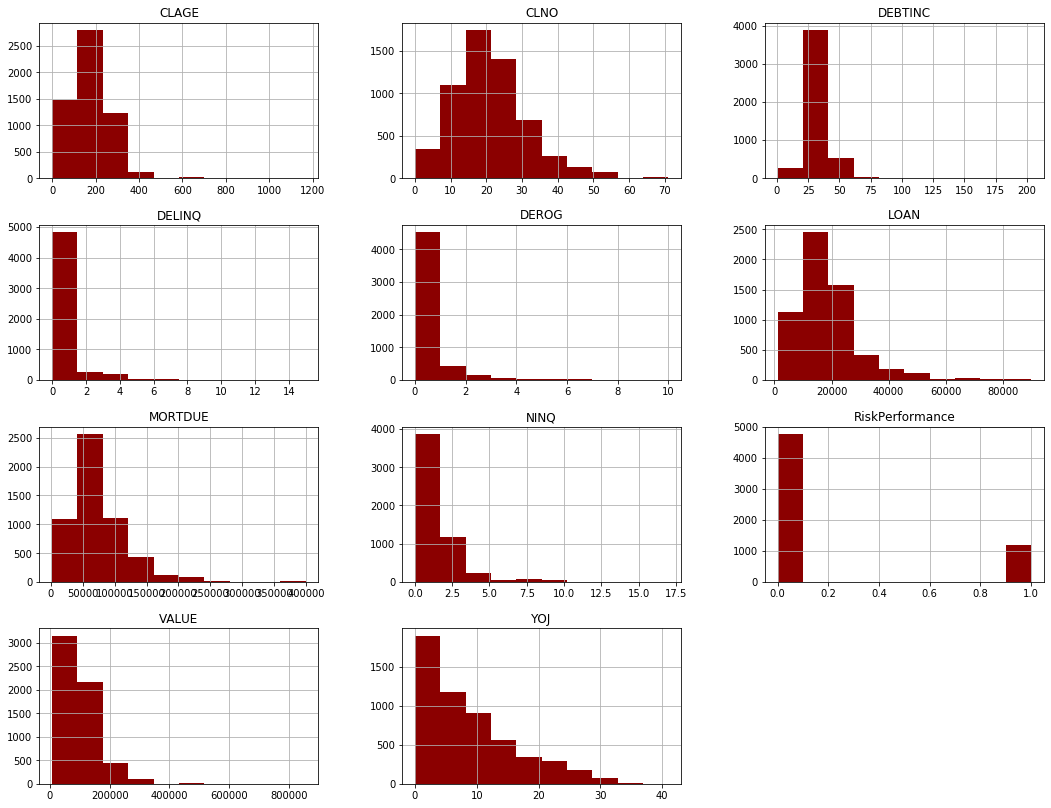

In [12]:
%matplotlib inline
mydata.hist(figsize=(18, 14),color="darkred")
plt.show()

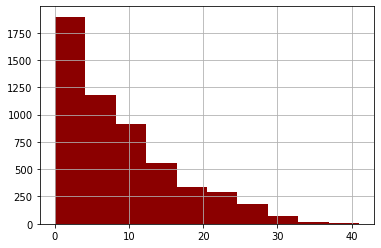

In [14]:
# Can look at a specific 
mydata["YOJ"].hist(color="darkred")

In [ ]:
idx_missing = mydata.columns[mydata.isna().any()].tolist()
msno.matrix(mydata[idx_missing])

In [ ]:
mydata.isnull().sum()

In [ ]:
# DEBTINC has highest amount of missing
# It is generally good to check if their is a systematic rel between
# 
mydata['MissingDebtinc'] = mydata['DEBTINC'].isna()
mydata.groupby( "RiskPerformance" ).agg({'RiskPerformance': 'count', 'MissingDebtinc': 'sum'})

In [ ]:
# We could keep the missingDebinc as a variable in the model, however, 
# I will in this exercise assume it contains little value
del mydata['MissingDebtinc']

In [ ]:
#idx_missing = mydata.columns[mydata.isna().any()].tolist()
#msno.matrix(mydata[idx_missing])

In [ ]:
# For this exercise we are going to impute missing values by the column mean
mydata.fillna(mydata.mean(), inplace=True)

In [ ]:
mydata.head()

In [ ]:
# Plot boxplots for categorical variables
def categoricalVarPlot( mydata, var_name ):
    var_count = mydata[ var_name ].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(var_count.index, var_count.values, alpha=0.9)
    plt.ylabel('Frequency', fontsize=14)
    plt.xlabel( var_name, fontsize=14)
    plt.show()

In [ ]:
categoricalVarPlot( mydata, 'JOB' )

In [ ]:
categoricalVarPlot( mydata, 'REASON' )

In [ ]:
# For the categorical variables use the most frequent occurence.
# Note: The simpleImputer applies same strategy to all missing values.
#       These are: mean, most_frequent, median and constant.
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
mydata[['REASON']] = impute.fit_transform(mydata[['REASON']])
mydata[['JOB']] = impute.fit_transform(mydata[['JOB']])

In [ ]:
mydata.head()

In [ ]:
# Unfortunately SKlearns ML methods do not handle categorical data directly
# Need to convert to 0/1. For nominal data we can use OneHot encodings
mydata_onehot = mydata.copy()
mydata_onehot = pd.get_dummies(mydata_onehot)
mydata_onehot.head()

In [ ]:
# Load common functions including my_corr_plot
%run "c:/Users/DDalevi/Chalmers tutorial/common.py"

In [ ]:
my_corr_plot( mydata )

In [ ]:
# Drop highly correlated variables (more than 0.9)
#corr_matrix = corr.abs()
#corr_matrix[ (corr_matrix>0.9) & (corr_matrix<1.0) ].dropna(how='all')

In [ ]:
pd.plotting.scatter_matrix( mydata, figsize=(15,10))
plt.show()

In [ ]:
# Can also look at any pair
# plt.scatter( mydata['MORTDUE'], mydata['LOAN'] )
# plt.show()

In [ ]:
#my_corr_plot( mydata )

In [ ]:
# Divide data into y and X
y = mydata_onehot['RiskPerformance']
X = mydata_onehot.drop(mydata_onehot.columns[0], axis=1)

In [ ]:
print( X.shape )
print( y.shape )

In [ ]:
# Univariate statistical tests
# For regression:     f_regression, mutual_info_regression
# For classification: chi2, f_classif, mutual_info_classif
# SelectKBest should be used with regression problems, not classification!
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif # chi2 not good here!
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit_transform(X, y)
X.columns[ selector.get_support() ]

In [ ]:
# Make function to plot variable importance
def variable_importance_plot(scores,X):
    # Get the indices sorted by most important to least important
    indices = np.argsort(scores)[::-1]
    N = X.shape[1]
    features = []
    for i in range(N):
        features.append( X.columns[indices[i]])

    # Now plot
    plt.figure()
    plt.barh(features, scores[indices[range(N)]], color='r', align='center')
    plt.gca().invert_yaxis()
    plt.show()    

In [ ]:
variable_importance_plot( selector.scores_, X )

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
myseed = 20191015
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=myseed)

In [ ]:
# Make a simple model using a Decision Tree
# A decision tree (DT) is the building block of a random forest
# Doesn't require rescaling of features
# DT is an interpretable model
# Series of yes/no questions predicting which class a sample belongs to 
# CART algorithm: Find splits of nodes leading to the greatest reduction in Gini Impurity
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

In [ ]:
#help( tree.DecisionTreeClassifier )

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
codes = {1:'Bad', 0:'Good'}
target_names=y_train.map( codes ).unique()

In [ ]:
# Visualizing the DT gives us transparency of how the model makes its decisions
# Each node shows:
# 1. Which rule is used
# 2. The average weighted decrease in geni impurity resulting from split
# 3. Number of samples 
# 4. Number of samples of each class (node leaves ideally having a single class)
# 5. Class is the prediction class (we can see that majority is picked)
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=sorted(target_names),  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph 

In [ ]:
#help( tree.export_graphviz )

In [ ]:
# Compute test error
from sklearn.metrics import accuracy_score
yhat = clf.predict( X_test ) 
accuracy_score( y_test, yhat )

In [ ]:
# Or simply use built in function
print(f'Train Accuracy: {clf.score(X_train, y_train)}')
print(f'Test  Accuracy: {clf.score(X_test, y_test)}')

In [ ]:
# Back to train vs test, why do we need to do that?
# Let's fit a deep tree.
test_deep = tree.DecisionTreeClassifier(max_depth=100)
test_deep.fit(X, y)
print(f'Model Accuracy: {test_deep.score(X, y)}')

In [ ]:
# We can more or less get the accuracy we want by growing the tree deep enough. 
# This doesn't generalize well to other datasets ("Overfitting"). 
# Important: A model you train will be applied to data it has not seen before!
# High variance: Your model will vary a lot with your training data as it has learned the "noise"
# We can see this by test/train split
test_deep.fit(X_train, y_train)
print(f'Train Accuracy: {test_deep.score(X_train, y_train)}')
print(f'Test  Accuracy: {test_deep.score(X_test, y_test)}')

In [ ]:
# Note: if you use a too shallow depth, your model will not be flexibel enough
#       even to learn the training data
# High bias: Model makes too naive assumptions about the data ("biased preconceived ideas about data")
test_shallow = tree.DecisionTreeClassifier(max_depth=1)
test_shallow.fit(X, y)
print(f'Model Accuracy: {test_shallow.score(X, y)}')  # Actually not too bad as we have such a good predictor!:)

In [ ]:
# Why accuracy is not enough. E.g. low number of positives, use rule that always predicts neg --> High acc but useless
# Confusion matrix
# For the first model with depth=4
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

In [ ]:
def plot_confusion(cm, title):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ["Bad","Good" ]
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text( j-0.2,i+0.3-(i)*0.55, str(s[i][j])+" = "+str(cm[i][j]), 
                      bbox=dict(facecolor='white', alpha=0.99))
    plt.show()

In [ ]:
plot_confusion(cm, "Risk Performance (DT)")

In [ ]:
# Saving a model, e.g. using joblib (also possible to use pickle) 
from sklearn.externals import joblib
joblib.dump( clf, "my_dt_model.sav")
joblib.dump( X_test, "X_test.sav" )
joblib.dump( y_test, "y_test.sav" )

In [ ]:
# Alternativly use pickle 
import pickle
pickle.dump( clf, open("my_dt_model.sav", 'wb'))
pickle.dump( X_test, open("X_test.sav", 'wb'))
pickle.dump( y_test, open("y_test.sav", 'wb'))

In [ ]:
# Test loading model in separate notebook, see Tutorial%20-%20use%20existing%20model.ipynb

In [ ]:
# While giving a transparent model that is easy to understand 
# DT have some limitations:
# See, https://scikit-learn.org/stable/modules/tree.html
# 1. Ability to completly learn the training data is a downside of DTs. Resulting in overcomplex trees
#    that do not generalize well. 
# 2. May be unstable, small variations in indata my result in completely different trees
# 3. Algorithmic issues, "learning an optimal decision tree is known to be NP-complete 
#    under several aspects of optimality and even for simple concepts"
# 4. Some concepts are hard to learn as DT do not express them well, e.g. XOR problem
# 5. May create biased trees when some classes dominate. May need to balance dataset prior to fitting.

In [ ]:
# Random forest built of many DTs. 
# Each tree is built from a random sample of the data (with replacement)
# Only a subset of the features is used for splitting a node (e.g. BMI, Blood pressure,...)
# Predictions are made by averaging over the the individual predictions
# Bagging = Bootstrap aggregation
# 
# Each tree has high variance (overfit) and low bias. combining 
# Fit model:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=20191917)
rnd_clf.fit(X_train, y_train)

In [ ]:
# Random forest can give you the variable importance directly
# Works using how ... predict Out of sample... (ADD EXPLANATION)
# for name, importance in zip(X.columns, rnd_clf.feature_importances_):
#    print(name, "=", importance)
variable_importance_plot( rnd_clf.feature_importances_, X )

In [ ]:
print(f'Train Accuracy: {rnd_clf.score(X_train, y_train)}')
print(f'Test  Accuracy: {rnd_clf.score(X_test, y_test)}')

In [ ]:
rnd_yhat = rnd_clf.predict( X_test ) 
rnd_cm = confusion_matrix( y_test, rnd_yhat )
plot_confusion(rnd_cm, "Risk Performance (RF)" )

In [ ]:
# Sometimes it can be good to look at the predictions to see what is output
vlx = pd.DataFrame( { 'predictions': rnd_yhat, 'observations': y_test } )
vlx.to_csv( "vlx.csv", sep=";" )

In [ ]:
# Optimization. If not performing well, there are a few things that can be considered.
# 1. In general, best approach is to see if we can gather more data and/or features. 
# When not possible, we need to turn to model hyperparameter tuning.
# Model parameters are learned during training, hyperparameters need to be defined before...
# RF hyperparameters: 
# i. Number of trees(n_estimators)
# ii. Number of features considered by each tree when splitting a node (max_features)
# iii. Max number of levels in each decision tree (max_depth)
# There are a few more, see documentation (e.g. min_samples_split, min_samples_leaf, bootstrap)
# Read about tuning here:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Model tuning with K-Fold CV can be automatically implemented in Scikit-Learn
#
# Gridsearch for best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier() 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit( X_train, y_train )

In [ ]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(rf_random.cv_results_)

In [ ]:
rnds_yhat = rf_random.predict( X_test ) 
rnds_cm = confusion_matrix( y_test, rnds_yhat )
plot_confusion(rnds_cm, "Risk Performance (RF)" )

In [ ]:
# For the proceeding methods let's rescale the features (x-mean)/sd
from sklearn.preprocessing import StandardScaler
numeric_cols = X_train.columns[0:10]
X_test_sc = X_test.copy()
X_train_sc = X_train.copy() 

X_test_sc[ numeric_cols ] = StandardScaler().fit_transform( X_test[ numeric_cols ] )
X_train_sc[ numeric_cols ] = StandardScaler().fit_transform( X_train[ numeric_cols ] )

In [ ]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='ovr')
lg_clf.fit(X_train_sc, y_train)

In [ ]:
print(f'Train Accuracy: {lg_clf.score(X_train_sc, y_train)}')
print(f'Test  Accuracy: {lg_clf.score(X_test_sc, y_test)}')

In [ ]:
lg_yhat = lg_clf.predict( X_test_sc ) 
lg_cm = confusion_matrix( y_test, lg_yhat )
plot_confusion( lg_cm, "Risk Performance (RF)" )

In [ ]:
# There is also a CV version that we be explored
from sklearn.linear_model import LogisticRegressionCV
lgcv_clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='ovr')
lgcv_clf.fit( X_train_sc, y_train )
print(f'Train Accuracy: {lgcv_clf.score(X_train_sc, y_train)}')
print(f'Test  Accuracy: {lgcv_clf.score(X_test_sc, y_test)}')
lgcv_yhat = lgcv_clf.predict( X_test_sc ) 
lgcv_cm = confusion_matrix( y_test, lgcv_yhat )
plot_confusion( lgcv_cm, "Risk Performance (RF)" )

In [ ]:
# Pipelines 1: Gridsearch demonstration

In [ ]:
# Create a simple gridsearch on a pipeline consisting on a selector and a logistic regression model
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = SGDClassifier(loss='log', penalty='l2', early_stopping=True,
                         max_iter=10000, tol=1e-5, random_state=0)
selector = SelectKBest(mutual_info_classif)
pipe = Pipeline(steps=[('selector', selector), ('logistic', logistic)])

In [ ]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'selector__k': [2,3,4,5,10,15],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, verbose=1, cv=5 ) # K-fold CV, 4 used for fit and 1 for validation
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:
# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_selector__k' 
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False)
plt.xlabel('Included number of predictors [k]')
plt.ylabel('Classification accuracy')
plt.tight_layout()
plt.show()

In [ ]:
# Pipeline 2: Fit several models with the same preprocessing step 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
pca_components = PCA() 
std_scaler = StandardScaler()
preprocess = FeatureUnion([("std",std_scaler), ("pca", pca_components)])
# Create a pipeline
pipe = Pipeline([("classifier", LogisticRegression())])
search_space = [
            {"classifier": [LogisticRegression()],
             "classifier__penalty": ['l2','l1'],
             "classifier__C": np.logspace(0, 4, 10)
             },
            {"classifier": [RandomForestClassifier()],
             "classifier__n_estimators": [10, 100],
             "classifier__max_depth":[5,8,15,None],
             "classifier__min_samples_leaf":[1,2,5],
             "classifier__max_leaf_nodes": [2,10]
             },
             {"classifier": [SVC()],
             "classifier__C": [0.1,1,10],
             "classifier__kernel":['linear','rbf','sigmoid']
            }]

gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=1,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
predictions = best_model.predict(X_train)
sum( predictions == y_train )/7844

In [ ]:
predictions = best_model.predict(X_test)
sum( predictions == y_test )/7844

In [ ]:
print(best_model.best_estimator_)

In [ ]:
scores_mean = cv_results['mean_test_score']
scores_sd   = cv_results['std_test_score']

In [ ]:
# For each number of components, find the best classifier results
results = pd.DataFrame(gridsearch.cv_results_)
components_col = 'param_classifier__kernel' 
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False)
plt.xlabel('Kernal')
plt.ylabel('Classification accuracy')
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame(gridsearch.cv_results_)

In [ ]:
results